In [160]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [161]:
data = pd.read_csv("Data/train.csv")
target = pd.read_csv("Data/test.csv")
train,test = train_test_split(data,test_size = 0.2,random_state=2137)
y_train = train["label"]
X_train = train.drop("label",axis=1)
y_test = test["label"]
X_test = test.drop("label",axis=1)

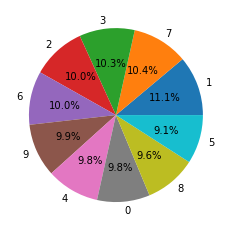

In [162]:
plt.pie(y_train.value_counts(),labels = y_train.value_counts().keys(),autopct='%1.1f%%')
plt.show()

Sample shape:  (784,)


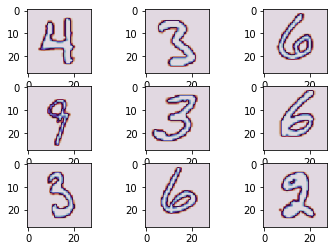

In [163]:
X_train = np.array(X_train)/255
y_train = np.array(y_train)
X_test = np.array(X_test)/255
y_test = np.array(y_test)
target = np.array(target)/255
print("Sample shape: ",X_train[0].shape)

for i in range(0,9):
    plt.subplot(3,3,1 + i)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.get_cmap('twilight_r'))
plt.show()

In [164]:
from tensorflow import keras
from keras.layers import Input,Dense,Dropout,Flatten
from keras import metrics, Model

def create_model(lr,drop):
    inp = Input(shape = (784),name = "input")

    x = Dense(units = 32, activation="relu")(inp)
    
    x = Dense(units = 16, activation="relu")(x)
    
    x = Dropout(drop, name = "dropout")(x)
    
    x = Dense(units = 10, activation="softmax",name="output")(x)
    
    optimizer = keras.optimizers.Adam(learning_rate = lr)
    loss = "sparse_categorical_crossentropy"
    
    model = Model(inp,x, name = "digit_detector")
    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = [
            "accuracy"
        ]
    )
    return model

def train_model(model,x,y,epochs,batch_size,validation_split):
    history = model.fit(
        x = x,
        y = y,
        epochs = epochs,
        batch_size = batch_size,
        shuffle = True,
        validation_split = validation_split
    )
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

def plot_output(epochs,hist,list_of_metrics):
    plt.figure(figsize=(10,5))
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

Epoch 1/100
27/27 [==============================] - 1s 20ms/step - loss: 2.1632 - accuracy: 0.1744 - val_loss: 1.6439 - val_accuracy: 0.3647
Epoch 2/100
27/27 [==============================] - 0s 11ms/step - loss: 1.5817 - accuracy: 0.3752 - val_loss: 1.1387 - val_accuracy: 0.6365
Epoch 3/100
27/27 [==============================] - 0s 9ms/step - loss: 1.1583 - accuracy: 0.6202 - val_loss: 0.7315 - val_accuracy: 0.8397
Epoch 4/100
27/27 [==============================] - 0s 12ms/step - loss: 0.8455 - accuracy: 0.7465 - val_loss: 0.5312 - val_accuracy: 0.8777
Epoch 5/100
27/27 [==============================] - 0s 10ms/step - loss: 0.6967 - accuracy: 0.7876 - val_loss: 0.4439 - val_accuracy: 0.8885
Epoch 6/100
27/27 [==============================] - 0s 9ms/step - loss: 0.6292 - accuracy: 0.8066 - val_loss: 0.3861 - val_accuracy: 0.9019
Epoch 7/100
27/27 [==============================] - 0s 8ms/step - loss: 0.5538 - accuracy: 0.8316 - val_loss: 0.3468 - val_accuracy: 0.9101
Epoch 8/1

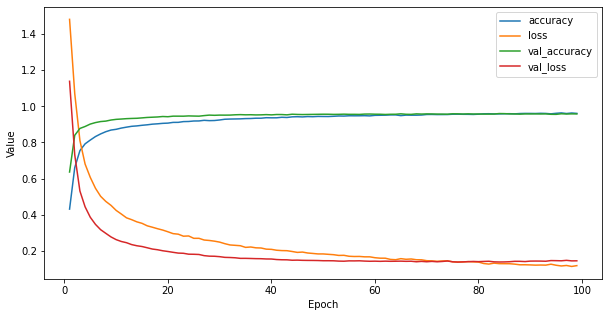

In [166]:
learning_rate =  0.001
dropout = 0.2
batch_size = 1024
epochs = 100
validation_split = 0.2
model = create_model(learning_rate,dropout)
epochs, hist = train_model(model,X_train,y_train,epochs,batch_size,validation_split)

plot_output(epochs,hist,["accuracy","loss","val_accuracy","val_loss"])

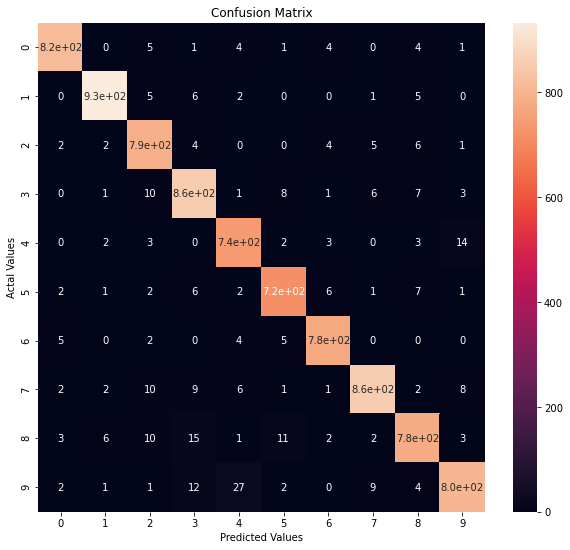

In [167]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_softmax = model.predict(X_test)
predictions = [np.argmax(i) for i in predictions_softmax]

cm = pd.DataFrame(confusion_matrix(y_test,predictions))
plt.figure(figsize=(10,9))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
predictions_softmax = model.predict(target)
predictions = [np.argmax(i) for i in predictions_softmax]

df = pd.DataFrame(predictions,columns=["Label"])
df.index.name = 'ImageId'
df.index += 1
df.to_csv("predictions.csv")